In [70]:
import pandas as pd
import matplotlib.pyplot as mb
import seaborn as sn
df = pd.read_csv(r'C:\Users\ilyes\Downloads\titanic-passengers.csv',sep=';')
df.head(5)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
#fill missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df["Cabin"].fillna('G6',inplace=True)
df["Embarked"].fillna('G6',inplace=True)


In [53]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'bar plot of age '}, xlabel='Age', ylabel='Survived'>

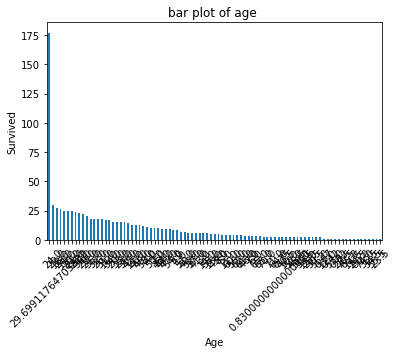

In [54]:
mb.xlabel("Age")
mb.ylabel("Survived")
mb.title("bar plot of age ")
vc=df['Age'].value_counts()
vc.plot.bar(rot=45)

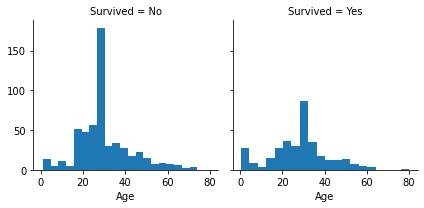

In [55]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Age',bins=20)

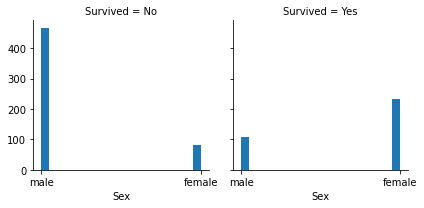

In [56]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Sex',bins=20)

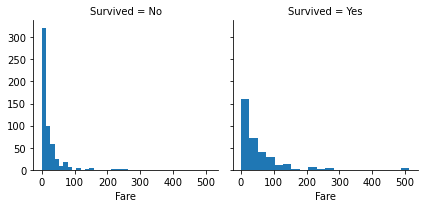

In [57]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Fare',bins=20)

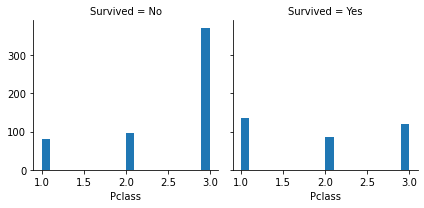

In [58]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Pclass',bins=20)

In [59]:
def plot_correlation_map():
    corr=df.corr()
    s,ax=mb.subplots(figsize=(12,10))
    cmap = sn.diverging_palette( 220 , 10 , as_cmap = True )
    s = sn.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


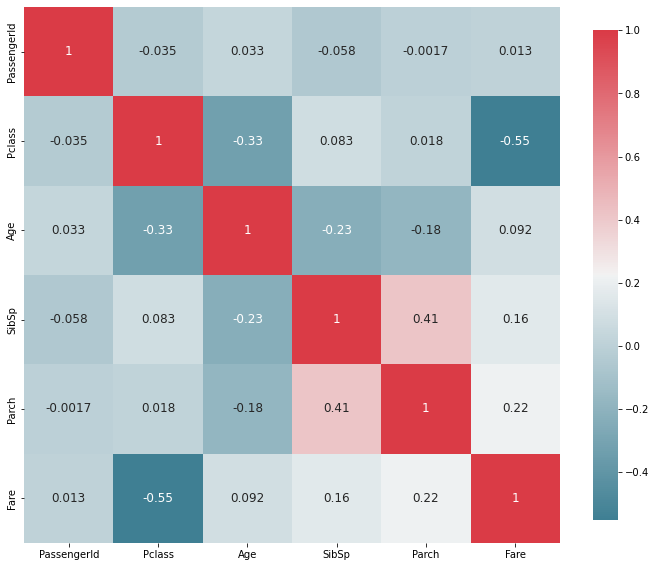

In [46]:
plot_correlation_map()

In [72]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [77]:
cleanup={"Survived":{"yes":1, "no": 0}} 
df.replace(cleanup, inplace=True)
df[["Pclass","Sex"]].groupby(["Pclass"]).mean()

C:\Users\ilyes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Pclass
1
2
3


#logistic regression

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [79]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
cleanup_sex={"Sex":{"male":1,"female":0}}
df.replace(cleanup_sex,inplace=True)
df['Age'].fillna(value=int(df['Age'].mean()), inplace=True)
df['Survived']=df['Survived'].map({'Yes':1,'No':0})
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,1,28.0,0,0,248740,13.0,S


In [80]:
x = df[['Age','Sex']]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Age', ylabel='Survived'>

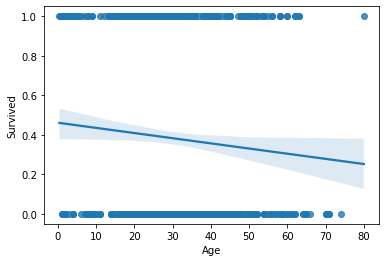

In [91]:
sn.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

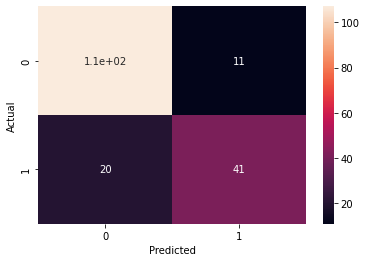

In [93]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       118
           1       0.79      0.67      0.73        61

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



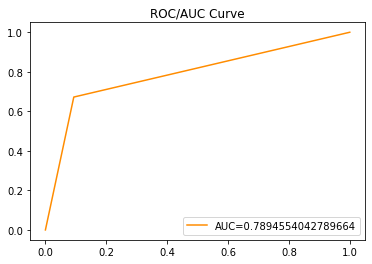

In [96]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
mb.plot(fpr,tpr,color='darkorange',label= "AUC="+str(roc_auc))
mb.legend(loc=4)
mb.title("ROC/AUC Curve")
mb.show()